In [48]:
url = 'https://en.wikipedia.org/wiki/FIFA_World_Cup'

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

html_content = requests.get(url).content
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find_all('tbody')
tr = soup.find_all('tr')

all_data = []
for i in range(21, 44):
    world = []
    td = tr[i].find_all('td')
    for data in td:
        world.append(data.text)
    all_data.append(world)
    
clean_data = list(map(lambda x: x[0:7], all_data))
column_name = [
    'Year',
    'Hosts',
    'Venues',
    'Total Attendance',
    'Matches',
    'Average Attendance',
    'Highest Attendance'
]

df = pd.DataFrame(clean_data, columns = column_name)

In [49]:
df.head()

,Year,Hosts,Venues,Total Attendance,Matches,Average Attendance,Highest Attendance
0,1930,Uruguay,3/1,"590,549",18,"32,808","93,000"
1,1934,Italy,8/8,"363,000",17,"21,353","55,000"
2,1938,France,10/9,"375,700",18,"20,872","58,455"
3,1950,Brazil,6/6,"1,045,246",22,"47,511","173,850[93]"
4,1954,Switzerland,6/6,"768,607",26,"29,562","63,000"


In [50]:
df.tail()

,Year,Hosts,Venues,Total Attendance,Matches,Average Attendance,Highest Attendance
18,2010,South Africa,10/9,"3,178,856",64,"49,670","84,490"
19,2014,Brazil,12/12,"3,429,873",64,"53,592","74,738"
20,2018,Russia,12/11,"3,031,768",64,"47,371","78,011"
21,2022,Qatar,8/5,"3,404,252",64,"53,191","88,966"
22,2026,Canada Mexico USA,,,80,,


In [51]:
df.isna().sum()

Year                  0
Hosts                 0
Venues                0
Total Attendance      0
Matches               0
Average Attendance    0
Highest Attendance    0
dtype: int64

Text(0.5, 1.0, 'World Cup')

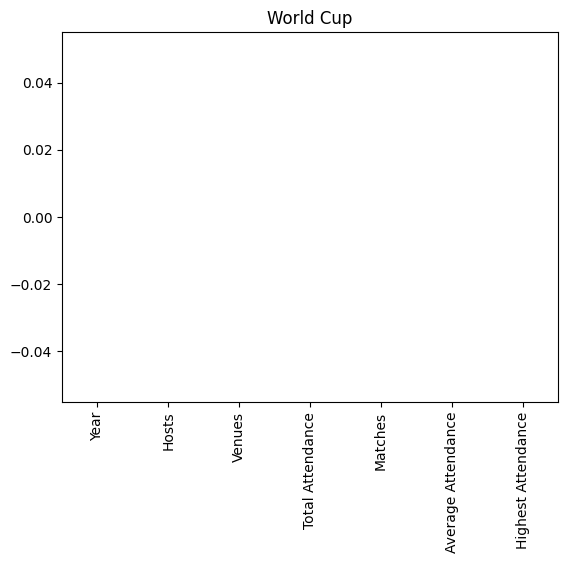

In [52]:
df.isna().sum().plot.bar()
plt.title("World Cup")

Text(0.5, 1.0, 'World Cup')

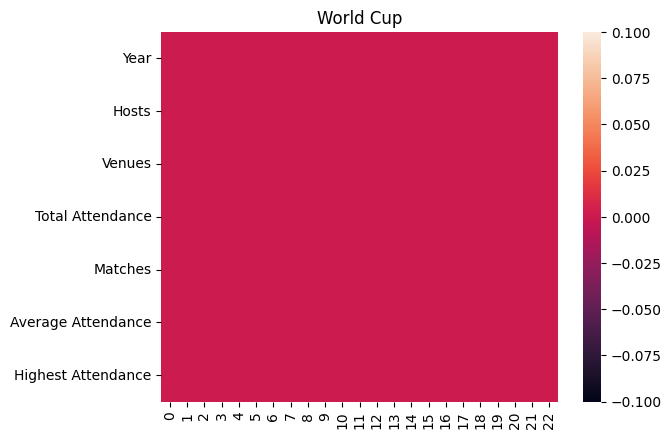

In [54]:
sns.heatmap(df.isna().transpose())
plt.title("World Cup")

Text(0.5, 1.0, 'World Cup Hosts')

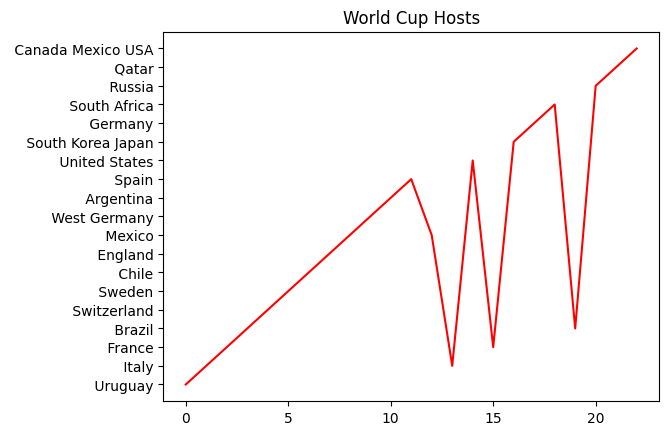

In [55]:
plt.plot(df["Hosts"][0:23], color = 'red')
plt.title("World Cup Hosts")

Text(0.5, 1.0, 'World Cup Venues')

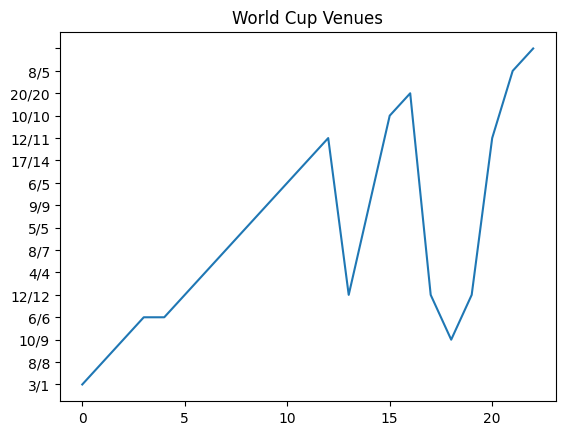

In [56]:
plt.plot(df['Venues'][0:23])
plt.title("World Cup Venues")

Text(0.5, 1.0, 'World Cup Total Attendance')

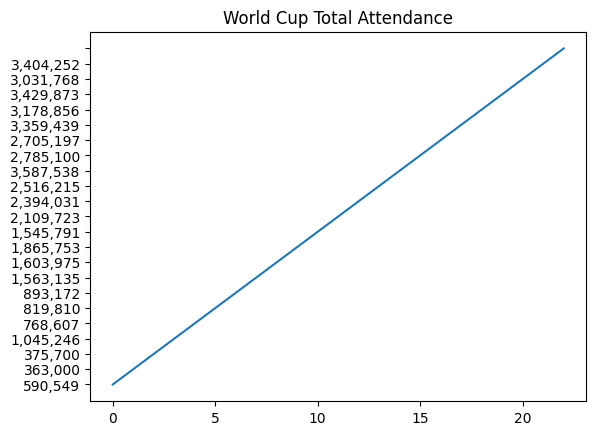

In [57]:
plt.plot(df['Total Attendance'][:23])
plt.title("World Cup Total Attendance")

Text(0.5, 1.0, 'World Cup Matches')

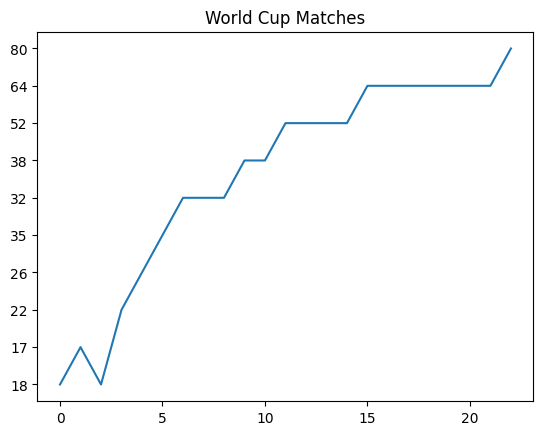

In [58]:
plt.plot(df['Matches'][:23])
plt.title('World Cup Matches')

Text(0.5, 1.0, 'World Cup Average Attendance')

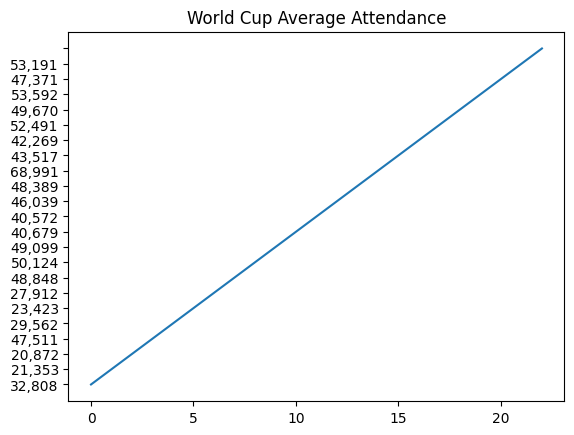

In [63]:
plt.plot(df['Average Attendance'][:23])
plt.title("World Cup Average Attendance")

In [61]:
df.to_csv("worldcup.csv", index = False)